In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt
import csv

# Leitura de dados

In [31]:
todos_dados = pd.read_csv("data.csv")
todos_dados['speechiness']

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.010200,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.199000,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.034400,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.604000,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.180000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.004790,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.014500,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.020200,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.048100,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.002080,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


# Seleção de atributos

In [3]:
dados_analise = pd.read_csv("data.csv", usecols=['acousticness','danceability','instrumentalness','energy','speechiness'])
dados_analise

,acousticness,danceability,energy,instrumentalness,speechiness
0,0.010200,0.833,0.434,0.021900,0.4310
1,0.199000,0.743,0.359,0.006110,0.0794
2,0.034400,0.838,0.412,0.000234,0.2890
3,0.604000,0.494,0.338,0.510000,0.0261
4,0.180000,0.678,0.561,0.512000,0.0694
5,0.004790,0.804,0.560,0.000000,0.1850
6,0.014500,0.739,0.472,0.000007,0.1560
7,0.020200,0.266,0.348,0.664000,0.0371
8,0.048100,0.603,0.944,0.000000,0.3470
9,0.002080,0.836,0.603,0.000000,0.2370


# Cálculo do melhor número de grupos

In [4]:
wcss = []
clusters = []
for n in range(2, 20):
    kmeans = KMeans(n_clusters=n, max_iter=10000)
    kmeans.fit(dados_analise)
    wcss.append(kmeans.inertia_)
    clusters.append(n)

wcss

[302.00151066099124,
 200.05441777653098,
 160.68491395042426,
 133.58686283273238,
 119.69972149291691,
 107.85968620738583,
 100.85120832065928,
 94.98603667124912,
 89.82635916674892,
 85.40231802723275,
 81.2237705921908,
 77.71880544180324,
 73.23990180820545,
 70.44176183319499,
 69.54764499633536,
 64.97806245365902,
 63.46625810330925,
 61.05915912766629]

<function matplotlib.pyplot.show(*args, **kw)>

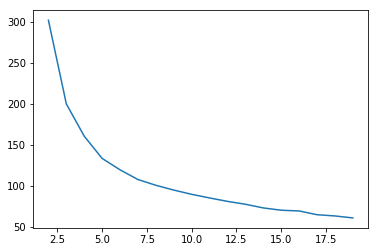

In [5]:
mp.plot(clusters,wcss)
mp.show

# Execução K-means

In [6]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=10000)

In [7]:
kmeans.fit(dados_analise)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [8]:
kmeans.labels_

array([4, 4, 4, ..., 0, 3, 0], dtype=int32)

In [9]:
todos_dados['Grupos'] = kmeans.labels_
dados_analise['Grupos'] = kmeans.labels_

In [10]:
todos_dados

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,Grupos
0,0,0.010200,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future,4
1,1,0.199000,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino,4
2,2,0.034400,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future,4
3,3,0.604000,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House,2
4,4,0.180000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys,3
5,5,0.004790,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake,4
6,6,0.014500,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake,4
7,7,0.020200,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega,3
8,8,0.048100,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips,0
9,9,0.002080,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws,4


# Data frame para cada grupo

In [11]:
clusters = []
clusters_infos = []
for i in range(0,num_clusters):
    for i in range(0,num_clusters):
        clusters.append(dados_analise.query('Grupos == '+ str(i)))
        clusters_infos.append(todos_dados.query('Grupos == '+ str(i)))
    

# Cálculo da média dos atributos de cada grupo

In [12]:
media_cluster = [[] for _ in range(num_clusters)]
for i in range(0,num_clusters):
    media_cluster[i].append(clusters[i].acousticness.mean())
    media_cluster[i].append(clusters[i].danceability.mean())
    media_cluster[i].append(clusters[i].energy.mean())
    media_cluster[i].append(clusters[i].instrumentalness.mean())
    media_cluster[i].append(clusters[i].speechiness.mean())
    
media_cluster

[[0.04957363552407932,
  0.555087818696884,
  0.8426968838526911,
  0.02515883923512748,
  0.09131515580736545],
 [0.7671279999999999, 0.548632, 0.3510272, 0.02583118936, 0.04861839999999999],
 [0.8801294117647058,
  0.42443529411764713,
  0.20563176470588235,
  0.7269529411764706,
  0.039852941176470584],
 [0.06137145933333333,
  0.6243822222222222,
  0.7668044444444445,
  0.7428311111111111,
  0.06975511111111111],
 [0.0647799536231884,
  0.729606884057971,
  0.6186141304347826,
  0.024921989275362315,
  0.1112461956521739],
 [0.37994135802469137,
  0.640679012345679,
  0.6309691358024692,
  0.015928808641975305,
  0.11070277777777777]]

# Gráfico radar para cada grupo

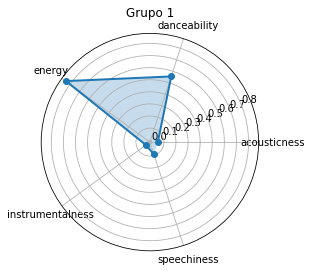

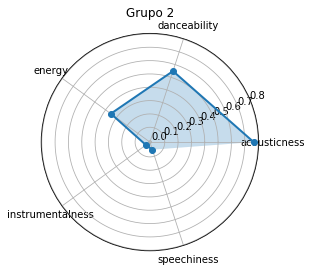

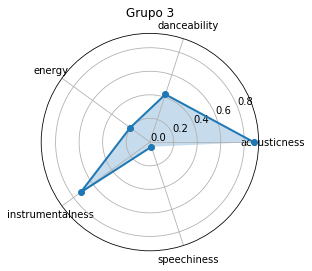

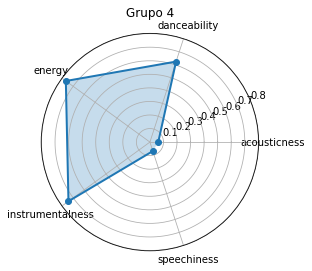

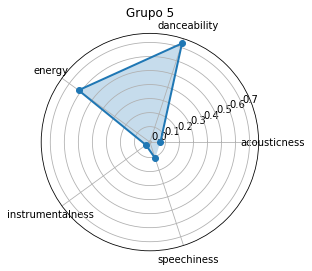

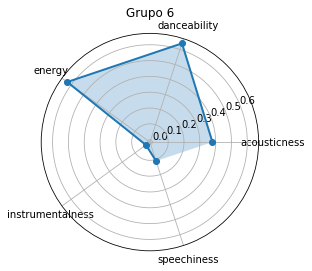

In [13]:
for n in range(0,num_clusters):
    labels = ['acousticness','danceability','energy','instrumentalness','speechiness']
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats=media_cluster[n]
    fig=plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title('Grupo ' + str(n+1))
    ax.grid(True)

# Exportando para CSV


In [14]:
for n in range(0,num_clusters):
    with open('grupo' + str(n+1)+'.csv', 'w') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=';', quoting=csv.QUOTE_MINIMAL)
        spamwriter.writerow(['song_title','artist'])
        for i in range(0,len(clusters_infos[n])):
            spamwriter.writerow([str(clusters_infos[n].iloc[i]['song_title']),str(clusters_infos[n].iloc[i]['artist'])])



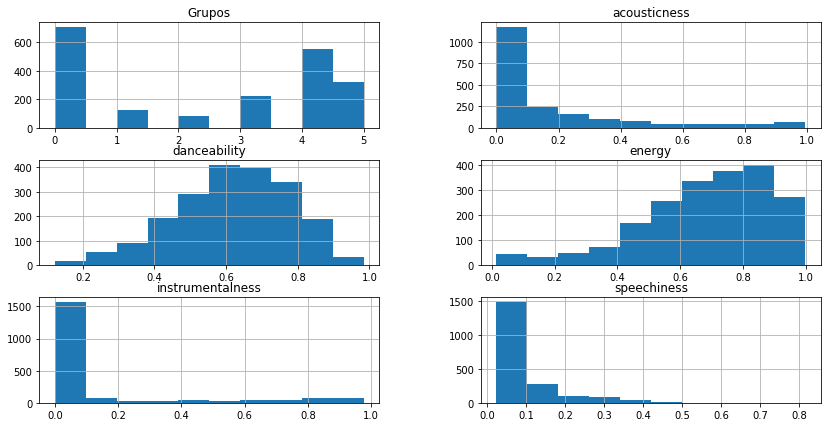

In [23]:
dados_analise.hist(figsize=(14,7))
plt.show()